Training part :
Car data -->  Data pre processing -->  Train Test split -->  Linear & Lasso Regression Model

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [113]:
# Loading the data from csv file to pandas Data frame
car_dataset = pd.read_csv('Datasets/car data.csv')

In [114]:
# Inspecting the first 5 rows of dataframe
print(car_dataset.head)

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1    

In [115]:
car_dataset.shape

(301, 9)

In [116]:
#getting some information about data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [117]:
#checking the number of missing values
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [118]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())

print(car_dataset.Seller_Type.value_counts())

print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [119]:
#Encoding the Categorical Data
car_dataset.replace({'Fuel_Type': {'Petrol':0 , 'Diesel':1 , 'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type': {'Dealer': 0 , 'Individual': 1}},inplace=True)

car_dataset.replace({'Transmission': {'Manual': 0 , 'Automatic': 1}},inplace=True)

In [120]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [121]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [122]:
print(X)
print(Y)
print("\n")
X.describe()

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


Splitting the Training and Test Data

In [123]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1, random_state=2)

In [124]:
X_train.shape,X_test.shape

((270, 7), (31, 7))

Model Training
  
  1.Linear Regresssion

In [125]:
lin_reg_model =LinearRegression()

In [126]:
lin_reg_model.fit(X_train , Y_train)

LinearRegression()

Model Evaluation

In [127]:
training_data_prediction = lin_reg_model.predict(X_train)

In [128]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493699


Visualise the actual prices and Predicted prices

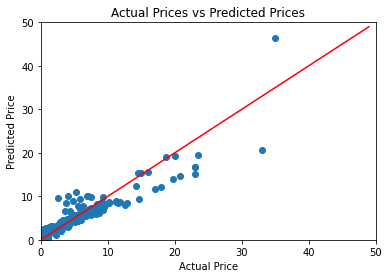

In [168]:
import numpy as np
x=np.arange(50)
y=x
plt.plot(x,y,"r")
plt.scatter(Y_train , training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.axis([0,50,0 ,50])
plt.show()

In [132]:
#predicting on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [146]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.8365766715026473


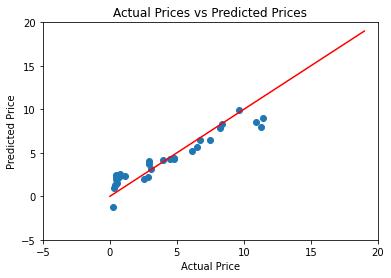

In [167]:
#Plotting for test data
plt.scatter(Y_test , test_data_prediction)
import numpy as np
x=np.arange(20)
y=x
plt.plot(x,y,"r")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.axis([-5,20,-5,20])
plt.show()

Lasso Regression

In [151]:
lasso_reg_model =Lasso()

In [152]:
lasso_reg_model.fit(X_train , Y_train)

Lasso()

In [169]:
training_data_prediction1 = lasso_reg_model.predict(X_train)

In [170]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction1)
print(error_score)

0.8427856123435795


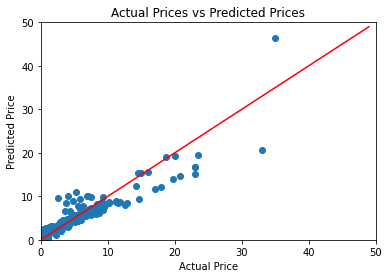

In [171]:
import numpy as np
x=np.arange(50)
y=x
plt.plot(x,y,"r")
plt.scatter(Y_train , training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.axis([0,50,0 ,50])
plt.show()

In [172]:
#predicting on test data
test_data_prediction1 = lasso_reg_model.predict(X_test)

In [173]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction1)
print(error_score)

0.8709167941173201


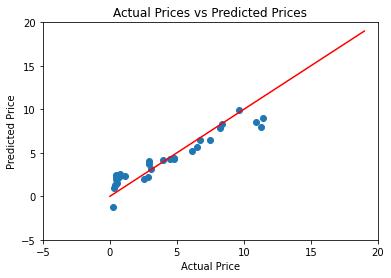

In [174]:
#Plotting for test data
plt.scatter(Y_test , test_data_prediction1)
import numpy as np
x=np.arange(20)
y=x
plt.plot(x,y,"r")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.axis([-5,20,-5,20])
plt.show()